## Reti neurali convoluzionali

In [1]:
## la convolution sostanzialmente prende l'immagine e analizza 
## la griglia dell'immagine spostandosi di finestre di dimensione specificata
## (griglia si intende tabella di pixels)
## ad esempio 3x3, ed assegna un valore che semplifichi quel che trova
## quindi analizzando una certa finestra dell'immagine, esempio 4x4, 
## assegnerà un certo valore deciso dall'algoritmo che permetterà di
## semplificare quell'area

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import numpy as np
from decidueye import graph_lib as gl
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

In [3]:
NAME = 'Cats-vc-dogs-cnn-64x2-{}'.format(int(time.time()))

In [4]:
tensorboard = TensorBoard(log_dir='C:/Users/jjjpi/Desktop/deep_learning/cats_dogs/logs/{}'.format(NAME))

In [5]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
session = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [6]:
X = pickle.load(open('C:/Users/jjjpi/Desktop/deep_learning/cats_dogs/processed_data/X.pickle', 'rb'))
y = pickle.load(open('C:/Users/jjjpi/Desktop/deep_learning/cats_dogs/processed_data/y.pickle', 'rb'))

## Normalizzo i dati

In [7]:
X = X / 255.0
# perché ovviamente il massimo è 255 ed il minimo è 0

## Suddivisione in Train e Test

In [8]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=777)

## Modello

In [9]:
model = Sequential()

#### primo strato

In [10]:
## il primo strato sarà uno strato convoluzionale con
##          -64 neuroni
##          -finestra 3x3
##          -dimensioni di X senza il -1, 
##           la matrice X salvata prima aveva dimensioni (-1, dim, dim, 1)
##           dove dim inizialmente era 50, ma si può scegliere il numero che si vuole
##           purché sia minore della dimensione reale

## dopo lo strato convoluzionale passo o uno strato di activation oppure uno strato di pooling
## in questo caso passo activation e poi pooling

model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#### secondo strato

In [11]:
model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#### terzo strato

In [12]:
## non è essenziale, ma per coerenza/correttezza aggiungo uno strato denso
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

#### variabile risposta

In [13]:
#### specifico la distribuzione probabilistica

In [14]:
model.add(Dense(1))
model.add(Activation('sigmoid'))

## Definizione parametri per allenamento

In [15]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

## Allenamento del modello

In [16]:
#import keras
#config = tf.ConfigProto(device_count={'CPU': 4})
#keras.backend.tensorflow_backend.set_session(tf.Session(config=config))

In [17]:
model.fit(X, y, 
          batch_size=32, 
          validation_split=0.3, 
          epochs=10, 
          callbacks=[tensorboard])

Train on 17462 samples, validate on 7484 samples
Epoch 1/10
17462/17462 [==============================] - 151s 9ms/step - loss: 0.6175 - acc: 0.6460 - val_loss: 0.5514 - val_acc: 0.7242
Epoch 2/10
17462/17462 [==============================] - 161s 9ms/step - loss: 0.5057 - acc: 0.7516 - val_loss: 0.5146 - val_acc: 0.7487
Epoch 3/10
17462/17462 [==============================] - 154s 9ms/step - loss: 0.4639 - acc: 0.7804 - val_loss: 0.4815 - val_acc: 0.7662
Epoch 4/10
17462/17462 [==============================] - 138s 8ms/step - loss: 0.4230 - acc: 0.8056 - val_loss: 0.4690 - val_acc: 0.7731
Epoch 5/10
17462/17462 [==============================] - 131s 8ms/step - loss: 0.3908 - acc: 0.8244 - val_loss: 0.4788 - val_acc: 0.7763
Epoch 6/10
17462/17462 [==============================] - 163s 9ms/step - loss: 0.3505 - acc: 0.8451 - val_loss: 0.4635 - val_acc: 0.7875
Epoch 7/10
17462/17462 [==============================] - 165s 9ms/step - loss: 0.3115 - acc: 0.8630 - val_loss: 0.4790 - v

In [19]:
#val_loss, val_acc = model.evaluate(X_test, y_test)
#print('loss = {}\naccuracy = {}'.format(val_loss, val_acc))

In [20]:
y_proba = model.predict(X) #sono i predict proba
y_pred = np.array([1 if i > 0.5 else 0 for i in y_proba])

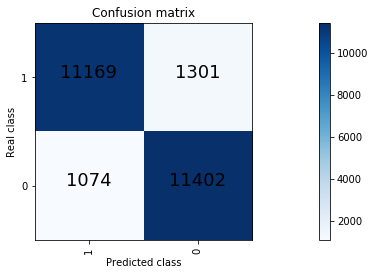

In [21]:
matr_conf_list = gl.plot_matrice_di_confusione(y, y_pred, classes=[1, 0])

In [22]:
# la rete sembra individuare meglio i gatti
# su tutti i gatti infatti ne individua correttamente l'86.07%
# mentre su tutti i cani, il 31.7% viene etichettato come gatto

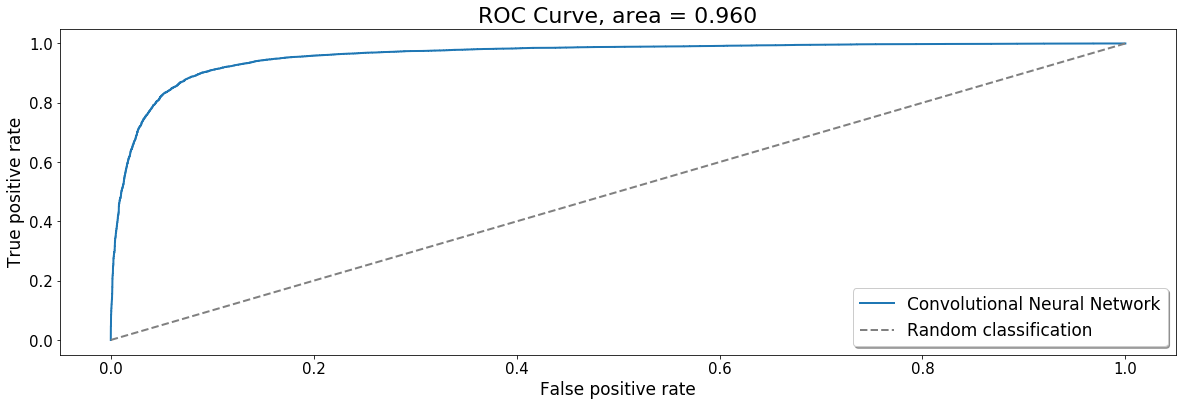

In [23]:
gl.plot_roc_curve(y, y_proba, label='Convolutional Neural Network')

In [ ]:
#plt.imshow(X_original[0], cmap=plt.cm.binary)
#plt.show()